## Birdy


Birdy offers through its `WPSClient` class a simplified interface to WPS processes, but it does not yet support the CWT-API extension (see [issue 102](https://github.com/bird-house/birdy/issues/102)). 
Look at the [doc](https://birdy.readthedocs.io/en/latest/) for more info. 

In [14]:
from birdy import WPSClient
#wps = WPSClient('https://bovec.dkrz.de/ows/proxy/emu')
wps = WPSClient('http://localhost:5000/wps')
help(wps.emu_subset)

Help on method emu_subset in module birdy.client.base:

emu_subset(variable=None, domain=None, operation=None) method of birdy.client.base.WPSClient instance
    subset netcdf files
    
    Parameters
    ----------
    variable : ComplexData:mimetype:`application/json`
        variable
    domain : ComplexData:mimetype:`application/json`
        domain
    operation : ComplexData:mimetype:`application/json`
        operation
    
    Returns
    -------
    output : ComplexData:mimetype:`application/x-netcdf`
        Output
    ncdump : ComplexData:mimetype:`text/plain`
        ncdump of subsetted Dataset.
    preview : ComplexData:mimetype:`image/png`
        Preview of subsetted Dataset.



In [15]:
from owslib.esgfapi import Variable, Domain, Dimension

In [16]:
# data files we want to process
files = [
    # OpenDAP, CORDEX EUR-44, tasmax, climate index SU (summer days)
    'http://opendap.knmi.nl/knmi/thredds/dodsC/CLIPC/gerics/climatesignalmaps/EUR-44/tasmax/su_python-2-7-6_GERICS_ens-multiModel-climatesignalmap-rcp85-EUR-44_yr_20700101-20991231_1971-2000.nc',
]


In [17]:
variable = Variable(uri=files[0], var_name='su')

In [18]:
domain = Domain([Dimension('time', 0, 1, crs='indices')], )

In [19]:
resp = wps.emu_subset(variable=variable, domain=domain)

In [20]:
resp.get(asobj=False)

emu_subsetResponse(
    output='http://localhost:5000/outputs/78b56d5a-28ab-11e9-a71a-b052162515fb/out.nc',
    ncdump='http://localhost:5000/outputs/78b56d5a-28ab-11e9-a71a-b052162515fb/nc_dump.txt',
    preview='http://localhost:5000/outputs/78b56d5a-28ab-11e9-a71a-b052162515fb/preview.png'
)

In [21]:
out = resp.get(asobj=True)

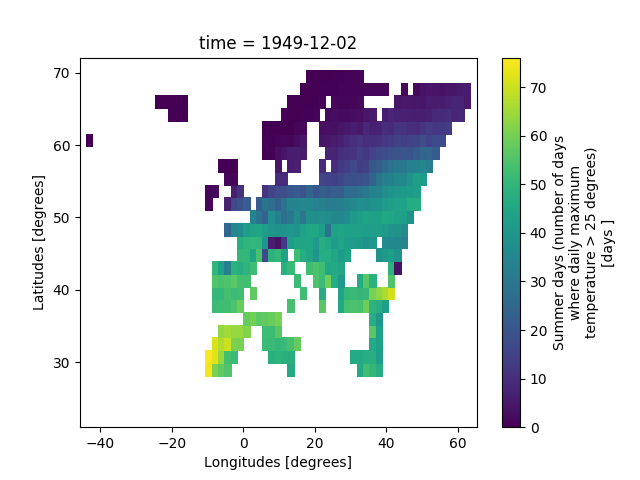

In [22]:
out.preview